## Importing Libraries & Data

In [ ]:
#General imports:
import pandas as pd
import numpy as np, array
import seaborn as sns
import re, os
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

#keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Conv1D, Conv2D    
from keras.models import Sequential
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.layers.recurrent import LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

from keras.models import Model
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from keras.preprocessing import text, sequence
from keras.callbacks import Callback

#sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA, TruncatedSVD

#NLTK
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk import wordnet
from nltk.corpus import stopwords
from nltk import PorterStemmer, WordNetLemmatizer
from textblob import Word
from nltk.tokenize import sent_tokenize, word_tokenize

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
path = "./sample_data/data.csv"
Comments = pd.read_csv(path)
Comments = Comments.loc[Comments["reviews"].notna()]
Comments = Comments.drop(['Unnamed: 0'],axis=1)
print(Comments.shape)
print(Comments['pass'].value_counts())

(8816, 50)
0    8331
1     485
Name: pass, dtype: int64


##preprocessing

In [ ]:
def preprocess_text(sen):
    sentence = re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',' ',str(sen)) # Removing html tags
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) # Remove punctuations and numbers
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) # Single character removal
    sentence = re.sub(r'\s+', ' ', sentence) # Removing multiple spaces
    sentence = sentence.replace("ain't", "am not").replace("aren't", "are not")
    sentence = ' '.join(text.lower() for text in sentence.split(' ')) # Lowering cases
    sw = stopwords.words('english')
    sentence = ' '.join(text for text in sentence.split() if text not in sw) #removing stopwords
    #sentence = ' '.join(text.lemmatize() for text in sentence.split()) #lemmatization
    return sentence

Comments['reviews'] = Comments.reviews.apply(preprocess_text)

In [ ]:
#identifying the prober max length

len_data = pd.DataFrame()
len_data['text_length'] = Comments['reviews'].apply(lambda x: len(x.split(" ")))
Comments["text_length"] = len_data["text_length"]

print(len_data.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))

maxlen = 15 # based on the percentiles

       text_length
count  8816.000000
mean     13.051384
std      16.663748
min       1.000000
10%       2.000000
20%       3.000000
30%       5.000000
40%       7.000000
50%       9.000000
60%      11.000000
70%      14.000000
80%      19.000000
90%      29.000000
max     457.000000


##tokenisation

In [ ]:
X = Comments.reviews
y = Comments['pass']

###standard tokenisation

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
vocab_size = len(tokenizer.word_index) + 1
X = pad_sequences(X, padding='post', maxlen=maxlen)

In [ ]:
word_index=tokenizer.word_index
print('***')
print('Number of unique words:',len(word_index))
print('***')
X

***
Number of unique words: 5518
***


array([[1296,  802,    1, ..., 5181,   81,    1],
       [ 481,  717,  199, ...,  581,  199, 1767],
       [ 179,  780,  184, ..., 5185, 1049,  582],
       ...,
       [   1, 1604,  984, ...,    0,    0,    0],
       [   9,  308,   33, ...,    0,    0,    0],
       [   1,  247,   18, ...,    0,    0,    0]], dtype=int32)

In [ ]:
reviews = pd.DataFrame(X)
reviews

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1296,802,1,1120,350,51,46,5180,498,140,259,122,5181,81,1
1,481,717,199,318,5184,1297,233,32,627,717,173,147,581,199,1767
2,179,780,184,1120,2378,1077,466,78,68,342,64,179,5185,1049,582
3,5186,2379,1049,99,5187,68,733,0,0,0,0,0,0,0,0
4,9,1,491,222,424,65,203,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,381,8,1,76,62,27,60,54,0,0,0,0,0,0,0
8812,963,230,5061,1,1,11,85,12,27,0,0,0,0,0,0
8813,1,1604,984,1336,944,689,1586,0,0,0,0,0,0,0,0
8814,9,308,33,14,1056,140,94,343,0,0,0,0,0,0,0


In [ ]:
Comments = pd.concat([reviews, Comments], axis=1)
Comments.drop(['reviews'], axis=1, inplace=True)
for i in Comments.columns:
  print(i)
print(reviews)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1_nat_com
2_nat_com
1_neg_com
2_neg_com
1_pos_com
2_pos_com
1_comments
2_comments
1_likes
2_likes
1_rep_post
2_rep_post
1_rep_rec
2_rep_rec
1_neg_rep_post
2_neg_rep_post
1_pos_rep_post
2_pos_rep_post
1_nat_rep_post
2_nat_rep_post
1_neg_rep_rec
2_neg_rep_rec
1_pos_rep_rec
2_pos_rep_rec
1_nat_rep_rec
2_nat_rep_rec
1_len_rep_rec
2_len_rep_rec
1_len_com
2_len_com
pass
1_pos_com_perc
1_nat_com_perc
1_neg_com_perc
1_pos_rep_post_perc
1_nat_rep_post_perc
1_neg_rep_post_perc
1_pos_rep_rec_perc
1_nat_rep_rec_perc
1_neg_rep_rec_perc
2_pos_com_perc
2_nat_com_perc
2_neg_com_perc
2_pos_rep_post_perc
2_nat_rep_post_perc
2_neg_rep_post_perc
2_pos_rep_rec_perc
2_nat_rep_rec_perc
2_neg_rep_rec_perc
text_length
        0     1     2     3     4     5     6     7    8    9    10   11  \
0     1296   802     1  1120   350    51    46  5180  498  140  259  122   
1      481   717   199   318  5184  1297   233    32  627  717  173  147   
2      179   780   184  1120  2378

## upsampling training set only with SMOTE

In [ ]:
from sklearn.utils import shuffle
Comments = shuffle(Comments)

In [ ]:
X = Comments.drop(['pass'], axis=1)#.values
y = Comments['pass']#.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)  #stratify=y equalise the number of observations in both Train and Test sets
X_train.shape, y_train.shape, X_test.shape,  y_test.shape
#len(X_train), len(X_test), len(y_train),len(y_test)

((7934, 64), (7934,), (882, 64), (882,))

In [ ]:
print(X_train.shape)
print(y_train.value_counts())

(7934, 64)
0    7498
1     436
Name: pass, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.value_counts())

(14996, 64)
0    7498
1    7498
Name: pass, dtype: int64


In [ ]:
X_train.shape, y_train.shape, X_test.shape,   y_test.shape

((14996, 64), (14996,), (882, 64), (882,))

In [ ]:
#selecting featuree using Gini-importance

def importance_features(df):
    df_importance =df
    y = df_importance['pass'].values
    X = df_importance.drop('pass',axis=1).values
    clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0, class_weight="balanced")
    clf.fit(X, y)
    df_importance=df_importance.drop(['pass'],axis=1)
    clf.fit(X, y)
    feats = {}
    for feature, importance in zip(df_importance.columns, clf.feature_importances_):
        feats[feature] = importance
        
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    importances_first_half=importances.sort_values(by='Gini-importance',
                                                   ascending=False).reset_index().rename(columns={"index":'Feature',
                                                                                                  'Gini-importance':'Importance'}).head(int(importances.shape[0]/3))
    importances_first_half=importances_first_half['Feature'].tolist()
    Completion_column='pass'
    #LearnerID='learner_id'
    importances_first_half.append(Completion_column) 
    #importances_first_half.append(LearnerID) 
    df2=df[importances_first_half]
    Fea_important=importances.sort_values(by='Gini-importance', ascending=False)
    return df2

In [ ]:
StudentData2 = Comments
StudentData_importance = importance_features(StudentData2)
print(StudentData_importance.shape)

(8816, 22)


In [ ]:
StudentData_importance

,2_len_com,2_comments,2_likes,2_pos_com,6,2_pos_com_perc,4,8,text_length,7,...,12,11,5,2_pos_rep_rec_perc,14,2,9,2_pos_rep_post,10,pass
6408,0,0,0,0,0,0.0,0,0,3,0,...,0,0,0,0.0,0,41,0,0,0,0
5823,1856,5,10,5,0,1.0,19,0,5,0,...,0,0,0,0.8,0,356,0,16,0,0
7915,0,0,0,0,0,0.0,0,0,1,0,...,0,0,0,0.0,0,0,0,0,0,0
5234,0,0,0,0,0,0.0,0,0,3,0,...,0,0,0,0.0,0,2,0,0,0,0
8688,2735,3,6,3,367,1.0,334,62,18,941,...,37,17,275,0.0,166,103,203,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,0,0,0,0,2265,0.0,2,2,10,4442,...,0,0,10,0.0,0,88,20,0,0,0
1838,0,0,0,0,158,0.0,141,58,27,952,...,304,2,50,0.0,5323,32,5322,0,1695,0
5508,0,0,0,0,7,0.0,143,0,7,0,...,0,0,2,0.0,0,36,0,0,0,0
6023,0,0,0,0,0,0.0,124,0,6,0,...,0,0,14,0.0,0,24,0,0,0,0


In [ ]:
from sklearn.utils import shuffle
StudentData_importance = shuffle(StudentData_importance)

In [ ]:
from sklearn.utils import shuffle
StudentData_importance = shuffle(StudentData_importance)

X = StudentData_importance.drop(['pass'], axis=1).values
y = StudentData_importance['pass'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7052, 21), (7052,), (1764, 21), (1764,))

# Deep Learning Models

In [ ]:
# Function to evaluate the model
def evaluate(model, history, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    
    # Making predictions from model
    y_pred = [1 if i>0.5 else 0 for i in model.predict(X_test)]
    y_pred_train = [1 if i>0.5 else 0 for i in model.predict(X_train)]
    
    # printing all results
    print(f"Training Accuracy: {metrics.accuracy_score(y_train, y_pred_train)}")
    print(f"Testing  Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print("-"*50)

    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_pred)    
    
    # Classification Report
    print("Classification Report")
    print(metrics.classification_report(y_test, y_pred)) 
    print("-"*50)
    

    
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, cmap="coolwarm", cbar=False)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()
    
    # Losses
    print("\n", '-'*50)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('val_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

### 1) Text Classification with Simple Neural Network

In [ ]:
#os.chdir('/content/drive/MyDrive/free_lance/2022-03-04_model_optimization/')
#os.chdir('/content/drive/My Drive/')

from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('./sample_data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, input_length=X_train.shape[1], trainable=True,weights=[embedding_matrix]) #weights=[embedding_matrix]
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 21, 100)           551900    
                                                                 
 flatten_6 (Flatten)         (None, 2100)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               210100    
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 767,571
Trainable params: 767,571
Non-tr

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=40, verbose=1, validation_split=0.2)

Epoch 1/40
177/177 [==============================] - 2s 11ms/step - loss: 0.0088 - acc: 0.9979 - val_loss: 0.1632 - val_acc: 0.9759
Epoch 2/40
177/177 [==============================] - 2s 10ms/step - loss: 0.0090 - acc: 0.9975 - val_loss: 0.1557 - val_acc: 0.9787
Epoch 3/40
177/177 [==============================] - 2s 10ms/step - loss: 0.0088 - acc: 0.9979 - val_loss: 0.1567 - val_acc: 0.9787
Epoch 4/40
177/177 [==============================] - 2s 10ms/step - loss: 0.0086 - acc: 0.9979 - val_loss: 0.1451 - val_acc: 0.9780
Epoch 5/40
177/177 [==============================] - 1s 6ms/step - loss: 0.0083 - acc: 0.9977 - val_loss: 0.1534 - val_acc: 0.9731
Epoch 6/40
177/177 [==============================] - 1s 6ms/step - loss: 0.0091 - acc: 0.9975 - val_loss: 0.1590 - val_acc: 0.9787
Epoch 7/40
177/177 [==============================] - 1s 6ms/step - loss: 0.0089 - acc: 0.9977 - val_loss: 0.1501 - val_acc: 0.9780
Epoch 8/40
177/177 [==============================] - 1s 6ms/step - loss

Training Accuracy: 0.9933352240499149
Testing  Accuracy: 0.9784580498866213
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1664
           1       0.88      0.72      0.79       100

    accuracy                           0.98      1764
   macro avg       0.93      0.86      0.89      1764
weighted avg       0.98      0.98      0.98      1764

--------------------------------------------------


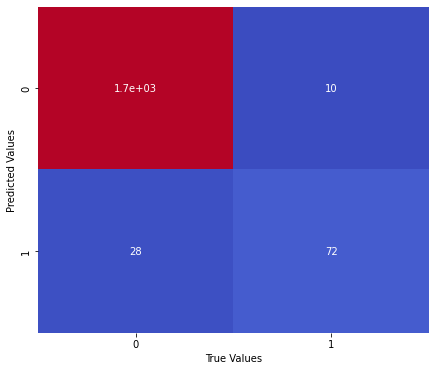


 --------------------------------------------------


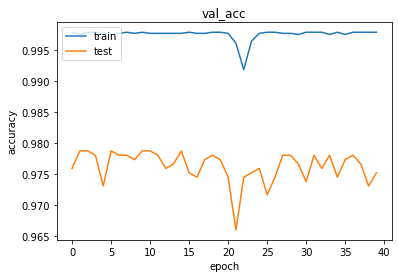

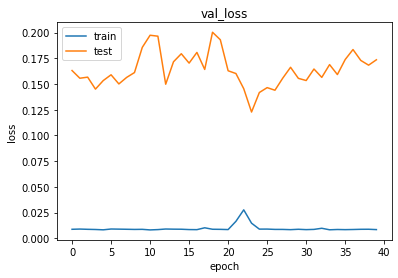

In [ ]:
evaluate(model, history)

### 2) Text Classification with LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=X_train.shape[1] , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 21, 100)           551900    
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 669,277
Trainable params: 117,377
Non-trainable params: 551,900
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_split=0.2, class_weight = {0: 1, 1: 100})

Epoch 1/15
177/177 [==============================] - 5s 14ms/step - loss: 2.3689 - acc: 0.1170 - val_loss: 0.9163 - val_acc: 0.4245
Epoch 2/15
177/177 [==============================] - 2s 11ms/step - loss: 1.8326 - acc: 0.3863 - val_loss: 1.0535 - val_acc: 0.2410
Epoch 3/15
177/177 [==============================] - 2s 10ms/step - loss: 1.5692 - acc: 0.4485 - val_loss: 0.7504 - val_acc: 0.6300
Epoch 4/15
177/177 [==============================] - 2s 11ms/step - loss: 1.3698 - acc: 0.5815 - val_loss: 0.7578 - val_acc: 0.5776
Epoch 5/15
177/177 [==============================] - 2s 10ms/step - loss: 1.1311 - acc: 0.6829 - val_loss: 0.9699 - val_acc: 0.5032
Epoch 6/15
177/177 [==============================] - 2s 11ms/step - loss: 1.0920 - acc: 0.6846 - val_loss: 0.6975 - val_acc: 0.6662
Epoch 7/15
177/177 [==============================] - 2s 10ms/step - loss: 0.9523 - acc: 0.7192 - val_loss: 0.6483 - val_acc: 0.6343
Epoch 8/15
177/177 [==============================] - 2s 11ms/step - 

Training Accuracy: 0.9041406693136699
Testing  Accuracy: 0.8968253968253969
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1664
           1       0.33      0.80      0.47       100

    accuracy                           0.90      1764
   macro avg       0.66      0.85      0.71      1764
weighted avg       0.95      0.90      0.92      1764

--------------------------------------------------


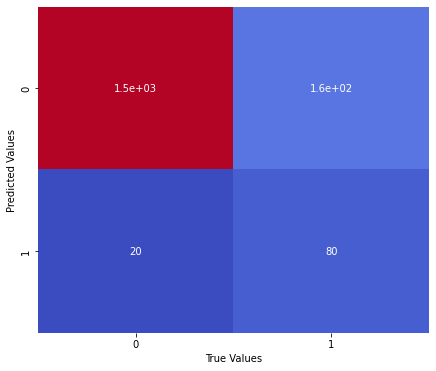


 --------------------------------------------------


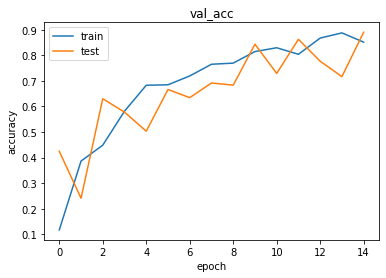

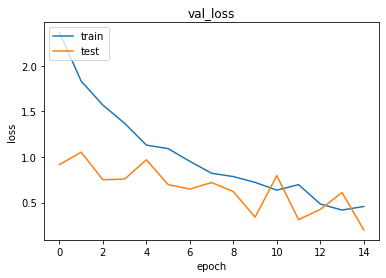

In [ ]:
evaluate(model, history)

### 3) Text classification with RNN

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[X_test.shape[1]])
    layer = Embedding(vocab_size,100,input_length=X_test.shape[1], weights =[embedding_matrix],trainable=True)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 21)]              0         
                                                                 
 embedding_14 (Embedding)    (None, 21, 100)           551900    
                                                                 
 lstm_6 (LSTM)               (None, 64)                42240     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
177/177 [==============================] - 5s 14ms/step - loss: 0.1992 - acc: 0.9426 - val_loss: 0.1506 - val_acc: 0.9561
Epoch 2/10
177/177 [==============================] - 2s 11ms/step - loss: 0.1204 - acc: 0.9638 - val_loss: 0.1076 - val_acc: 0.9759
Epoch 3/10
177/177 [==============================] - 2s 10ms/step - loss: 0.0842 - acc: 0.9741 - val_loss: 0.0826 - val_acc: 0.9787
Epoch 4/10
177/177 [==============================] - 2s 11ms/step - loss: 0.0637 - acc: 0.9796 - val_loss: 0.0821 - val_acc: 0.9780
Epoch 5/10
177/177 [==============================] - 2s 11ms/step - loss: 0.0489 - acc: 0.9879 - val_loss: 0.0778 - val_acc: 0.9809
Epoch 6/10
177/177 [==============================] - 2s 10ms/step - loss: 0.0415 - acc: 0.9888 - val_loss: 0.1067 - val_acc: 0.9802
Epoch 7/10
177/177 [==============================] - 2s 10ms/step - loss: 0.0353 - acc: 0.9918 - val_loss: 0.0868 - val_acc: 0.9802
Epoch 8/10
177/177 [==============================] - 2s 11ms/step - 

Training Accuracy: 0.9922007941009643
Testing  Accuracy: 0.9784580498866213
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1664
           1       0.89      0.71      0.79       100

    accuracy                           0.98      1764
   macro avg       0.94      0.85      0.89      1764
weighted avg       0.98      0.98      0.98      1764

--------------------------------------------------


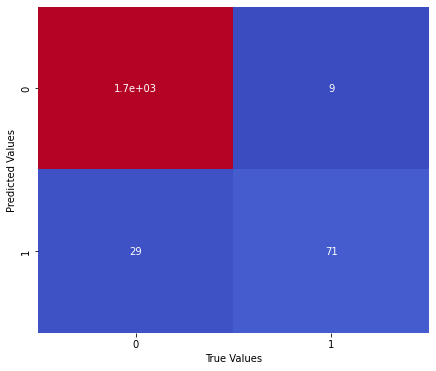


 --------------------------------------------------


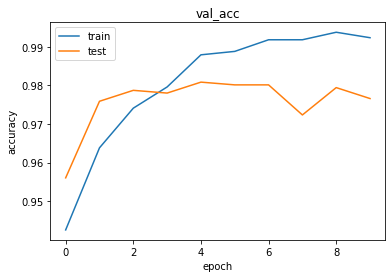

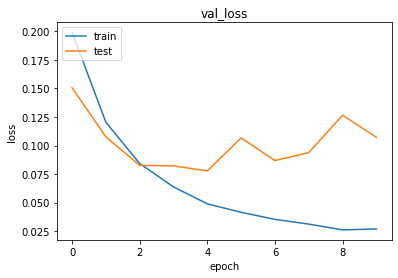

In [ ]:
evaluate(model, history)